Vandita Shukla, Student No - 17141590


# Practical 7 - Part 1A



## Import libraries 

In [3]:
%matplotlib inline
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [4]:
# Define a set of two-dimensional Cartesian points
pts1Cart = np.array([[240.5000, 16.8351, 33.5890, 164.2696, 149.1911],
                    [248.8770, 193.5890, 251.3901, 168.4581, 228.7723]])



# Convert points into homogeneous representation
pts1Hom = np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)
# Define a homography
H = np.array([[0.6, 0.7, -100.],
              [1.0, 0.6, 50.],
              [0.001, 0.002, 1.0]])

# Apply a homography to the points
pts2Hom = np.matmul(H,pts1Hom)
# Convert back to Cartesian coordinates
pts2Cart = pts2Hom[0:2,:] / np.tile([pts2Hom[2,:]],(2,1))
# Add a small amount of noise. Set this to zero to begin with to see if your homography solution is spot on.
noiseLevel = 0.0
pts2Cart = pts2Cart + np.random.normal(0, noiseLevel, pts2Cart.shape)


## Plotting

Let's plot the the first original set of points, `pts1Cart`, in blue and the second set of points, `pts2Cart`, in red. 

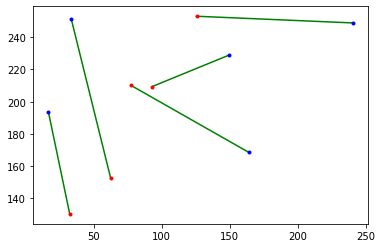

In [5]:
# Plot a green line between pairs of start points (blue) and transformed points (red).|
nPoint = pts1Cart.shape[1]
for cPoint in range(0, nPoint):
    plt.plot([pts1Cart[0,cPoint], pts2Cart[0,cPoint]], [pts1Cart[1,cPoint], pts2Cart[1,cPoint]],'g-')
    plt.plot(pts1Cart[0,cPoint],pts1Cart[1,cPoint],'b.', pts2Cart[0,cPoint],pts2Cart[1,cPoint],'r.') 

plt.show()

## Homography estimation time!

We've formulated our test example; now our goal is to estimate the homography that maps the first set of points to the second set of points.


In [6]:
def solveAXEqualsZero(A):
    
    [U,L,Vh]=np.linalg.svd(A,full_matrices=True)
    V=np.transpose(Vh)
    [x, y]=np.shape(V)
    h=np.zeros([x,1])
    h=V[:,y-1]
    return h

In [7]:
def calcBestHomography(pts1Cart, pts2Cart):
    
    # This function should apply the direct linear transform (DLT) algorithm to calculate the best 
    # homography that maps the cartesian points in pts1Cart to their corresonding matching cartesian poitns 
    # in pts2Cart.
    
    # This function calls solveAXEqualsZero. Vandita remember to be wary of how to reshape h into a 3 by 3 matrix. 

    n_points = pts1Cart.shape[1]
    
    # TO DO: replace this:
    H = np.identity(3)
    pts1Hom = np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)
    pts2Hom = np.concatenate((pts2Cart, np.ones((1,pts2Cart.shape[1]))), axis=0)
    # Then construct the matrix A, size (n_points * 2, 9)
    # Consult the notes!
    A = np.zeros([n_points*2,9])
    
    for i in range(n_points):
               
        A[i*2,:]=[0,0,0,-pts2Hom[0,i],-pts2Hom[1,i],-1,pts1Hom[1,i]*pts2Hom[0,i],pts1Hom[1,i]*pts2Hom[1,i],pts1Hom[1,i]]
        A[((i*2)+1),:]=[pts2Hom[0,i],pts2Hom[1,i],1,0,0,0,-pts1Hom[0,i]*pts2Hom[0,i],-pts1Hom[0,i]*pts2Hom[1,i],-pts1Hom[0,i]]
    # Solve Ah = 0 using solveAXEqualsZero and get h.
    
    h = solveAXEqualsZero(A)
    # Reshape h into the matrix H, values of h go first into rows of H
    print(h.shape)
    H = np.reshape(h,(3,3))
    #H[0,:]=[h[0,],h[1,],h[2,]]
    #H[1,:]=[h[3,],h[4,],h[5,]]
    #H[2,:]=[h[6,],h[7,],h[8,]]
    print(H)
    return H

## Test time!

Time to put it all together. 

Now we need a way of measuring how well our mapping does. To do this we will apply our estimated mapping, `HEst`, to `pts1Cart` and obtain estimated points `pts2EstCart`. We will compare `pts2EstCart` and `pts2Cart` using a sum of squared difference to see how well our solution at least approximates the transformed noisy points `pts2Cart`.

Red points on the plot are the noisy points we observe, `pts2Cart`, and the magenta points are the transformed points, `pts2EstCart`, that we get when we apply our estimated homography on `pts1Cart`. The black lines represent the error between both points; if you've set `noiseLevel` to 0, then `sqDiff` should be 0 and the points should overlap perfectly.

(9,)
[[ 5.36587421e-03  6.26018658e-03 -8.94312369e-01]
 [ 8.94312368e-03  5.36587421e-03  4.47156184e-01]
 [ 8.94312368e-06  1.78862474e-05  8.94312368e-03]]
Sqaured difference between pts2Cart and pts2EstCart is: 0.00


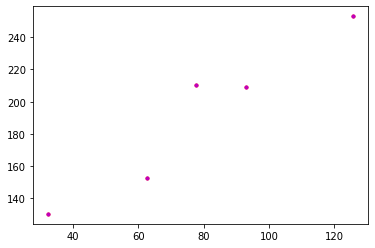

In [8]:
# Replace this with a call to the function calcBestHomography. 
HEst = calcBestHomography(pts2Cart,pts1Cart)

# Apply estimated homography to points
pts2EstHom = np.matmul(HEst,pts1Hom)

# Convert back to Cartesian coordinates
pts2EstCart = pts2EstHom[0:2,:] / np.tile([pts2EstHom[2,:]],(2,1))

# Calculate the mean squared distance from actual points
sqDiff = np.mean(sum((pts2Cart - pts2EstCart)**2))

print("Sqaured difference between pts2Cart and pts2EstCart is: %.2f" % sqDiff)

# Draw figure with points before and after applying the estimated homography
nPoint = pts1Cart.shape[1]

# Plot a black line between pairs of actual points (red) and estimated points (magenta)
for cPoint in range(0, nPoint):
    plt.plot([pts2Cart[0,cPoint], pts2EstCart[0,cPoint]], [pts2Cart[1,cPoint], pts2EstCart[1,cPoint]],'k-')
    plt.plot(pts2Cart[0,cPoint],pts2Cart[1,cPoint],'r.',pts2EstCart[0,cPoint],pts2EstCart[1,cPoint],'m.') 

plt.show()

Homography calculated here using calcBestHomography(pts1,pts2) calculates it in the following order-> It finds the homography matrix which if multiplied to pts2 (second argument of the function) maps to pts1. I kept that order in mind. As seen above on calling calcBestHomography(pts2cart, pts1cart) in that order we get a homography that maps the latter argument to the previous argument pts2cart. This mapping without noise gives an exact overlap of magenta over red which are the points of pts2cart.